# Leading Ladies and Lost Revenue: A Causal Analysis of Female

Representation and Box-Office Returns

Lizzie Healy (Georgetown University)  
August 11, 2025

This work will investigate the impact of gender bias in the film industry pertaining to economic outcomes. Specifically, it will establish a causal link between a film casting a female actress in the leading role and the resulting box-office revenue. This will be accomplished utilizing propensity weighting, which will match movies based on the perceived similarity of their characteristics. These predictor variables will include the year, month of release, genre, runtime, director and writers, star power level of the cast, MPAA rating, country of release, language, film description, the production budget, the country of release, production companies, and tagline. To deal with the variables that are non-numeric the following steps will be taken. Firstly, a manufactured metric will be created to capture the preceived ‘starpower’ of the actors/actresses. Secondly, a sentiment analysis will be performed on the film description and tagline. The primary outcome variable will be the box-office number measured in US dollars, measured as the gross value worldwide. The IMDb score will be employed as an additional outcome measure to be used as a robustness check. The initial hypothesis is that films that opt to feature a female in the leading role will experience a decrease value in the box-office revenue.

## Introduction

In [1]:
import matplotlib.pyplot as plt
import numpy as np

#| label: fig-timeline
#| fig-cap: Visual of the 
#| fig-alt: An event plot of the years of the last 8 eruptions on La Palma.

The film industry has been a dominant force in United States entertainment since cinema became a popular pastime in the 1930s and 1940s \[@science_cinema_history\]. Today, it remains an extremely lucrative business, to the tune of approximately \$77 billion annually \[@statista_film\]. This enduring profitability has attracted filmmakers, production companies, economists, and film enthusiasts alike, all seeking to understand what drives the success of a film. Some highly anticipated films, backed by a compelling storyline, a star-studded cast, and a substantial production budget, go on to dominate the box office and sweep critical awards, while others flop on opening weekend and struggle to recoup their investment. So, what makes a movie successful? Is there some magic formula, or are there specific pre-production factors that drive revenue? These questions remain unanswered, but in the century since the dawn of film, research-backed theories have begun to emerge.

As a first attempt at providing one such theory, my previous paper, [Behind the Box Office: Directorial Influence on Film Revenue in the United States Entertainment Industry](./assets/thesis.pdf) attempted to analyze the link between director quality and the box-office success of a film. The paper created two novel measures of director quality: a summation of all box-office revenue earned by the director’s films and the accumulated number of critical awards from the fifteen years leading up to the film in question. The main dependent variable was domestic box-office revenue, and a robustness check was implemented, changing the dependent variable to the IMDb rating earned.

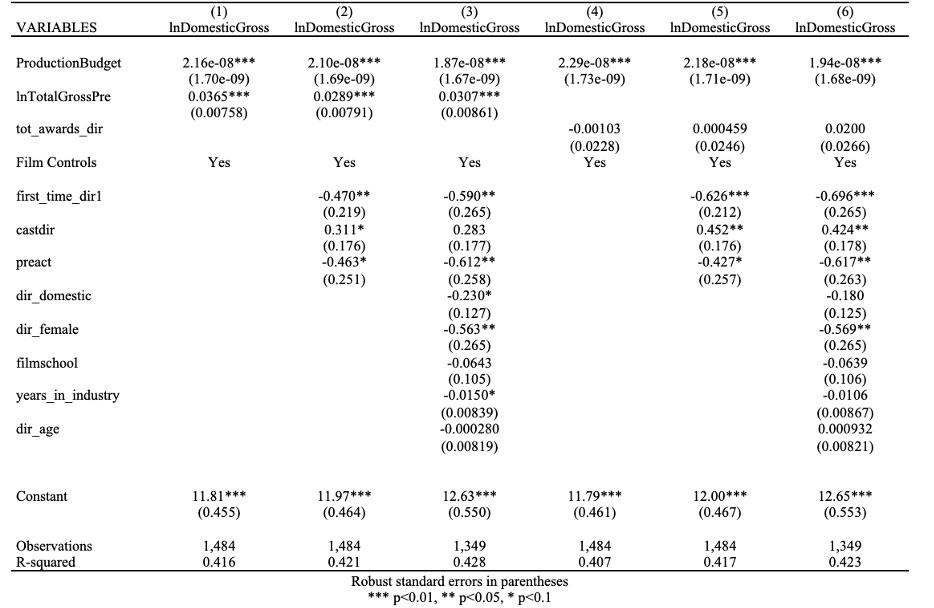

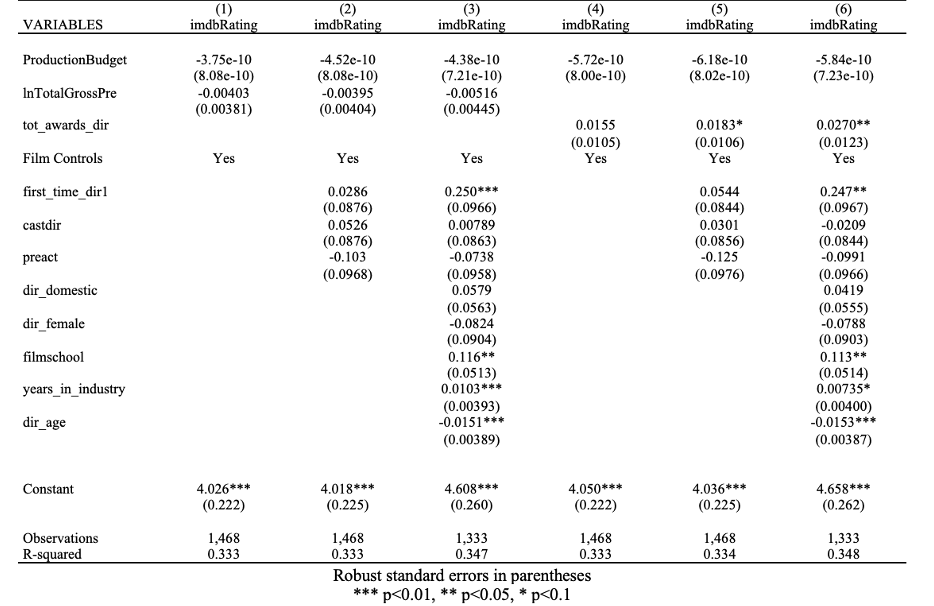

The paper found that an increase in director financial quality yielded between a 0.0289% and 0.0307% increase in domestic gross and no impact on IMDb rating. Conversely, director quality in terms of critical acclaim yielded no significant impact on domestic gross, but between 0.01803 and 0.0270 point increase in IMDb rating. The paper also discovered a statistically significant decrease in domestic gross for female directors as compared to male directors outlined in @tbl-1 and @tbl-2.

Overall, the results were thought-provoking; however, the methodology used was lacking in the causality department. The research, if anything, worked towards establishing a weak association due to its statistical analysis going only so far as a simple ordinary-least-squares regression and controlling for confounding variables. While the variables were considered and included in the regression equation, they were all treated equally as controls; thus, a more complex analysis is warranted.

Moving forward, the work to get to causality includes introducing causal methods for handling covariates instead of just controlling for them. Furthermore, I wanted to investigate the conclusion of gender bias further and shifted this analysis to examine actors instead of directors.

Thus, this paper will investigate the impact of gender bias in the film industry pertaining to economic outcomes. Specifically, it will attempt to establish a causal link between a film casting a female actress in the leading role and the resulting box-office revenue by employing propensity score matching.

Data collection and preparation are discussed in @sec-data. Methodology, manufactured variables, and propensity scoring are discussed in @sec-meth. Results and analysis are presented in @sec-results. Results are discussed in @sec-discuss. Concluding remarks, limitations, and future work are discussed in @sec-conclusion.

## Data

The data for this research was collected from two separate sources: [Open Movie Database (OMDb)](https://www.omdbapi.com/) and [The Movie Database (TMDb)](https://www.themoviedb.org/). Both are sources for movie and television metadata, differing only in their sourcing and specific variables provided. OMDb partly sources from Amazon’s Internet Movie Database (IMDb) and then relies on crowdsourcing for missing data, while TMDb is independently created and relies solely on crowdsourcing from its community of film buffs to provide data entry for films. Both of these sources offer an API that allowed for the collection of movie metadata, which was then merged using an inner join on the film Title and resulted in the following variables: `Title`, `Year`, `Runtime`, `Budget`, `Released`, `Genre` (Action, Adventure, Animation, Biography, Comedy, Crime, Documentary, Drama, Family, Fantasy, Film Noir, History, Horror, Music, Musical, Mystery, Romance, Sci-Fi, Sport, Thriller, War, Western), `MPAA Rating` (G, GP, M, M/PG, NC-17, Not-Rated, PG, PG-13, R, TV-MA, Unrated, Accepted), `Production Companies`, `Director`, `Writer`, `Country`, `Language`, `Description`, `Tagline`, `Overview`, `Actors`, `Box Office`, `Revenue`, `IMDb Rating`, `Metascore`, `IMDb Votes`, `TMDb rating`, `Vote Count`, `Awards`, and `Poster URL`.

With this combined dataset, some further preparation was required to move forward with the analysis. Firstly, some variables were dropped as they were deemed unimportant, while others were very similar across the datasets; for example, only the ‘Description’ was kept, and the ‘Overview’ variable was dropped. All missing and zero values in numerical variables were removed, and each of the variables was converted to the correct data type. The ‘Released’ date was split into three variables for the month, day, and year. For the categorical variables, two different techniques were utilized. For ‘Genre’ and ‘MPAA rating’, a one-hot encoding was applied. However, for the ‘Language’ and ‘Country’ only the first observation of each was kept, which was then categorized simply as either English or other language, and domestic (for the US) and international for all other countries.

The final dataset included a total of 2,816 films with 61 columns of variables.

| Variable    | Minimum | Maximum     |
|-------------|---------|-------------|
| Box Office  | 3,622   | 858,373,000 |
| Budget      | 7,000   | 460,000,000 |
| Runtime     | 63      | 238         |
| IMDb Rating | 1.9     | 9.3         |
| IMDb Votes  | 1,672   | 3,059,994   |

The IMDb Rating, which is a score given by the Internet Movie Database, takes ratings given by IMDb users and aggregates them to generate a single rating from 0 to 10 for each film, with 10 indicating a perfect film and 0 indicating the worst possible film. In this dataset, the lowest rating given was a 1.9, while the highest rating was a 9.3, and the average was around a 6.6 rating. As shown in @fig-2, there is a clear decline in the average IMDb Rating over the years, beginning around 1970 and flattening out over the last 20 or so years.

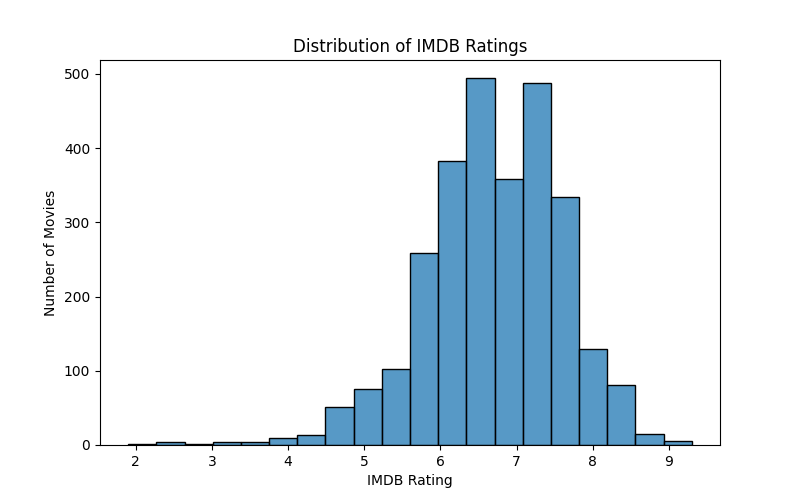

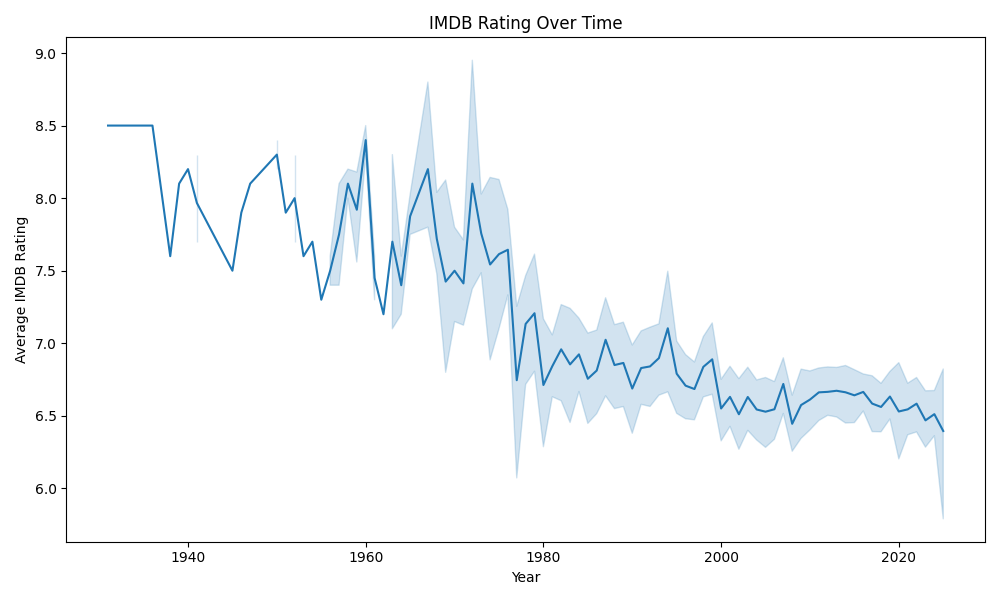

The Box Office value is the total revenue earned by the film from ticket sales for the film’s release in theatres only. This metric is often utilized in entertainment economics literature as a proxy for the success of the film. This number boosts a mean of around 73.5 million. As shown in @fig-3, unlike the IMDb rating, the box office has seen a general increasing trend over the years since 1970, except for 2020 when theatres were closed due to COVID-19.

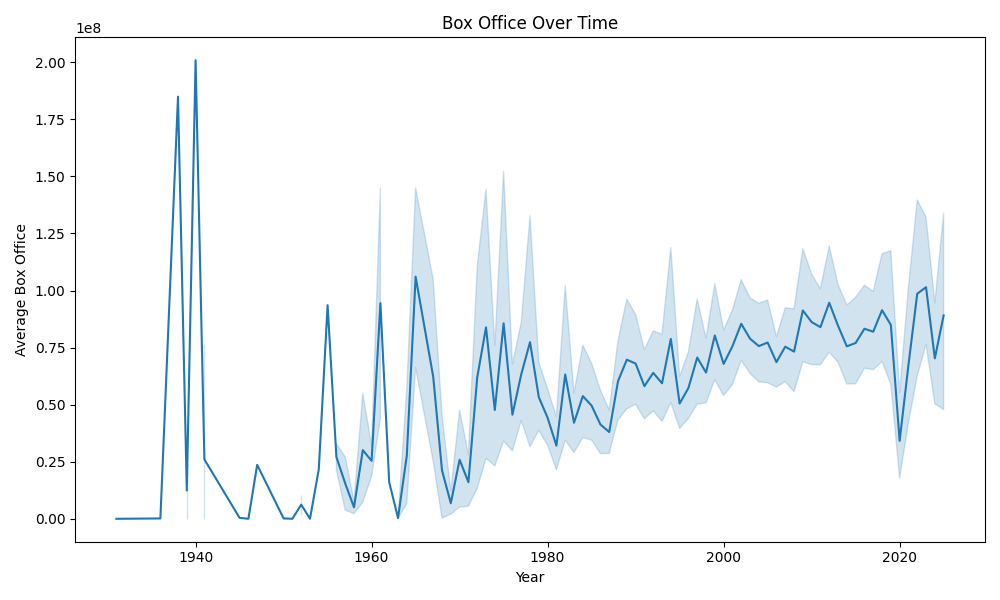

When looking at the categorizations of the films, we see that most fall into the genres of drama, comedy, action, and adventure and have an MPAA rating of R, PG-13, or G (@fig-4 and @fig-5).

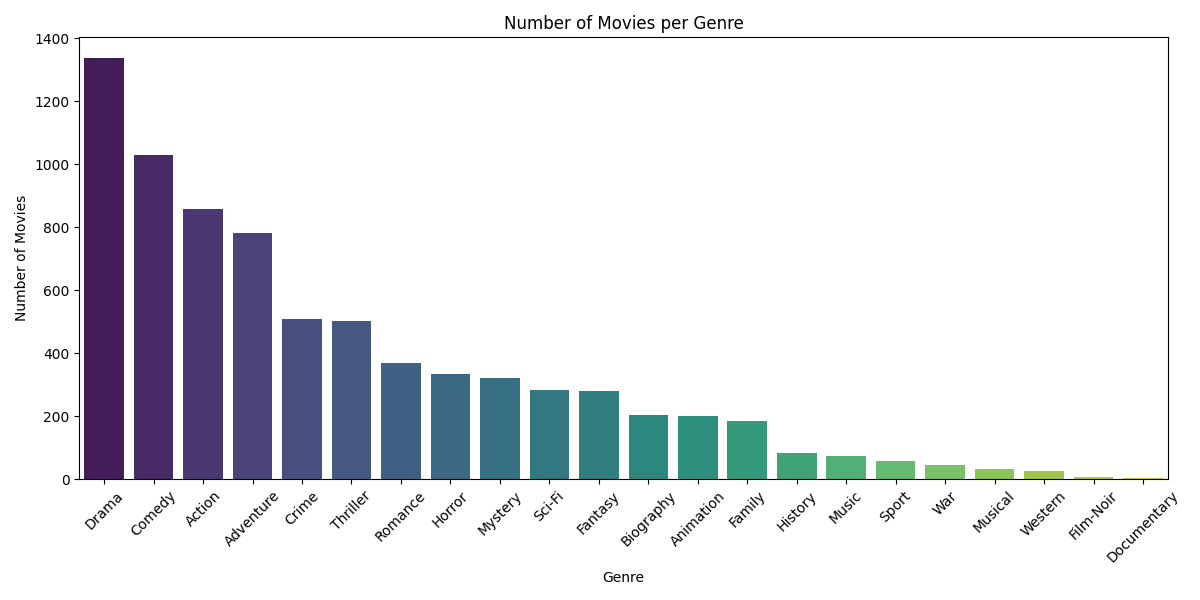

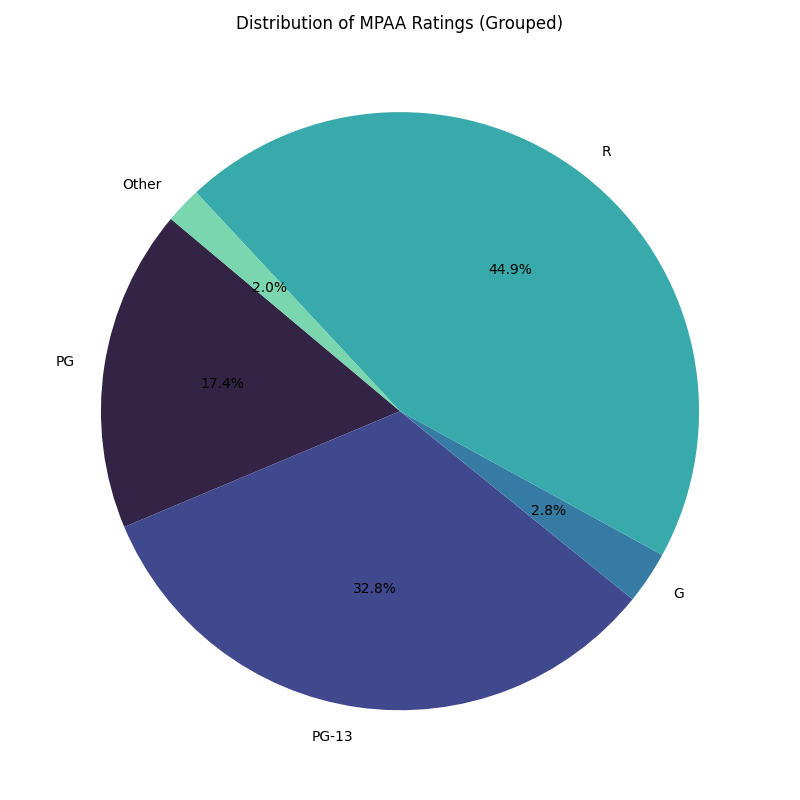

## Methodology

### Manufactured Variables

#### Top Directors, Writers, Production Companies

In order to incorporate the level of expertise of the team creating the film, this analysis worked to categorize the level of directors, writers, and production companies. All of these were attempting to better match movies based on the level of effort put into its creation in terms of money, knowledge, experience, and previous success. To achieve this, three lists were collected that detailed the top directors, writers, and production companies:

@imdb_top_directors  
@imdb_top_writers  
@the_numbers_production_companies

The directors and writers were judged on a combination of their perceived skill and their lifetime achievement in terms of awards and accolades. The production companies were compiled simply based on the total domestic box-office revenue amassed across all films they have produced.

The director, writer, and production company variables were then referenced against these lists, receiving a 1 if the entity was mentioned in the list and a 0 otherwise, resulting in three one-hot encoded variables: `Top_Production`, `Top_Director`, and `Top_Writer`. For the sake of simplicity, if more than one entity was listed for any of these variables, only the first entity was taken into account.

#### Tagline and Description Sentiment Analysis

In order to extract meaningful value from the film description and tagline, sentiment analysis was performed on the text. This sentiment analysis was performed by an off-the-shelf pre-trained model publicly available on Hugging Face @distilbert_sst2_hf . This model was trained on English text specifically for binary text classification and achieved a high accuracy score. The result is two variables with a binary value of 1 for positive sentiment or 0 for negative sentiment of both the film description and film tagline.

| Title | Tagline | Tagline Sentiment |  |
|----------------------|---------------------|------------------|-------------|
| Surf’s Up | A Major Ocean Picture. | 1 |  |
| The BFG | The world is more giant than you can imagine. | 1 |  |
| Twin Peaks: Fire Walk with Me | In a town like Twin Peaks, no one is innocent. | 0 |  |
| Meet the Robinsons | If you think your family’s different, wait ’til you meet the family of the future. | 1 |  |
| The Royal Tenenbaums | Family isn’t a word … It’s a sentence. | 0 |  |

| Sentiment | Count |
|-----------|-------|
| Positive  | 1476  |
| Negative  | 1340  |

#### Starpower Variable

One of the most important building blocks of a film is the cast of actors and actresses, and well-known names can be a huge draw to the theatres for movie-goers. This feature seemingly has an impact on the outcome of the film and its financial success. Thus, finding a way to classify the ‘starpowerness’ of the cast was paramount to this analysis. The dataset, unfortunately, only provides the three main cast members, which discounts films that rely on an ensemble cast or have a large enough budget to cast many big names. That being said, this research attempted to define a metric that quantified this ‘starpower’ aspect of the three cast members, in the hopes that the success and name-recognition can be at least partly captured.

The metric was created by collecting lists of A-list and B-list actors and actresses.

@imdb_a_list_actors  
@imdb_a_list_actresses  
@imdb_b_list

In film terms, these categorizations reflect how ‘bankable’ the stars are or how much financial draw they bring to a film, theoretically. These lists are all collected from IMDb and include a wide range of household names. With these lists, the cast variable was split into `actor1`, `actor2`, and `actor3` based simply on the order in which they were listed. Then, each of the cast variables was referenced against all three of the lists. The film title received:

-   **2 points** if a cast member was part of the A-list  
-   **1 point** if a cast member was part of the B-list

These points were added in the `starpower` variable and then divided by three to get a finalized score of the points across the three cast members. @tbl-6 shows an example of the scoring.

| actor1         | actor2            | actor3          | starpower |
|----------------|-------------------|-----------------|-----------|
| Mark Wahlberg  | Tyrese Gibson     | André 3000      | 0.666667  |
| Jamie Bell     | Andy Serkis       | Daniel Craig    | 1.333333  |
| Ryan Reynolds  | Blake Lively      | Peter Sarsgaard | 0.333333  |
| Marc Singer    | Tanya Roberts     | Rip Torn        | 0.000000  |
| Tom Hiddleston | Samuel L. Jackson | Brie Larson     | 1.000000  |
| Jeremy Renner  | Ed Helms          | Jake Johnson    | 0.000000  |
| Frankie Muniz  | Amanda Bynes      | Paul Giamatti   | 1.000000  |
| Ben Barnes     | Skandar Keynes    | Georgie Henley  | 0.000000  |
| Jason Bateman  | Charlie Day       | Jason Sudeikis  | 1.000000  |
| Jack Black     | Ana de la Reguera | Héctor Jiménez  | 0.333333  |

#### Feamle Leading Role Variable

This analysis relied on the ability to distinguish between female and male leading actresses and actors; however, this is not something directly encoded into the metadata of a film, thus this variable had to be manufactured. In order to achieve this, a list of all current female actresses was collected from Wikipedia @wiki_film_actresses. This list included 2,816 names of female actresses, alphabetized. To note, there were attempts to utilize a list of all female names and an off-the-shelf model to guess whether the cast member listed identified as male or female, however, both of these methods produced more inaccuracy, thus the list of female actresses method was proceeded with.

The next step was to determine only the presumed lead cast member by extracting the first person listed in the `actors` variable of the dataset. This name was then compared against the list of female actresses and received a value of 1 if the cast member was included on the list.

Therefore, the result was a variable titled `female_lead` if the first cast member listed in the IMDb metadata was a member of the current working female actress list and a 0 if the cast member was not a member of the list and, thus, presumably a male actor. @tbl-7 displays an example of the accuracy results of this variable.

| Title         | First Actor        | Female Lead |
|---------------|--------------------|-------------|
| The Family    | Robert De Niro     | 0           |
| The Shack     | Sam Worthington    | 0           |
| The Dead Zone | Christopher Walken | 0           |
| The Ref       | Denis Leary        | 0           |
| Flyboys       | James Franco       | 0           |
| ATL           | Tip ‘T.I.’ Harris  | 0           |
| Like a Boss   | Tiffany Haddish    | 1           |
| Enemy Mine    | Dennis Quaid       | 0           |
| Proud Mary    | Taraji P. Henson   | 1           |
| Valmont       | Colin Firth        | 0           |

As displayed in @tbl-8 the films were split between 488 films with female leading actresses and 2328 films with male leading actors.

| Name         | Year |
|--------------|------|
| Female Leads | 488  |
| Male Leads   | 2328 |

### Propensity Score Matching

With these manufactured variables created, the primary statistical analysis performed was propensity score matching (PSM). This statistical method allows for comparison of films that are similar across all observed covariates, differing only in whether the lead is a male or female actor or actress. In this context, the presence of a female lead is handled as a treatment, and the effect of that treatment on the outcome variable is estimated.

Unlike simply including covariates as controls in a regression equation, this technique aims to reduce selection bias by matching treated and control units based on their likelihood of receiving the treatment, given the covariates. This creates a more comparable dataset, which quasi-mimics the conditions of a randomized experiment.

The process of propensity score matching began with normalizing the variables due to the very differing range of values across variables like the IMDb rating (which is 0-10) and the budget (which can reach hundreds of millions). This was done with Sklearn’s StandardScaler @scikit_learn_standardscaler and performed on all numerical variables.

Following this step, the variance inflation factor (VIF) was checked to investigate any multicollinearity issues among the covariates that would bias the analysis. This yielded some problematic variables, which resulted in excluding those that exceeded the VIF threshold of 10 points. The following variables were excluded: international country (domestic country kept), other language (English kept), musical genre (all other genre categories kept), and accepted MPAA rating (all other MPAA ratings kept).

Next, a logistic regression was estimated. The variables `metascore`, `IMDb votes`, `TMDb rating`, `TMDb votes`, `Oscars Won`, `Oscars Nominated`, `Award Wins`, and `Award Nominations` were omitted because they are ex-post variables, meaning they represent effects of the outcomes as opposed to causes of it, thus creating data leakage and bias. Therefore, only ex-ante variables are considered. The resulting equation is as follows, representing a female leading role as the treatment and the film characteristics as covariates:

The result of this equation is propensity scores (ps) for each film title (dataset row), which represent the calculated probability of the film having a female leading actress. A score close to 0 indicates a higher likelihood of the film having a male lead, while a score closer to 1 indicates a higher likelihood of a film having a female lead. These scores are then used to match, utilizing 1:1 nearest neighbor matching, the movies across the two groups of leading actors/actresses based on the closest propensity score. This results in a matched dataset with each row being a matched pair of films that are similar in all aspects except for the leading role.

| Female Led Movie  | PS Female | Male Led Movie              |
|-------------------|-----------|-----------------------------|
| Miss Congeniality | 0.082866  | Back to the Future Part III |
| GI Jane           | 0.031775  | Gladiator                   |
| Freaky Friday     | 0.212226  | The Boat the Rocked         |
| Kill Bill: Vol. 2 | 0.066924  | 2 Fast 2 Furious            |

The final step was to calculate and compare the box-office performance of matched female versus male lead films. These results are discussed in @sec-results.

### Robustness Checks

As a robustness check, the `IMDb rating`, which is a score from 0-10, calculated from a weighted average of user ratings on the Internet Movie Database, is utilized as a secondary outcome variable. The same methodology of propensity score matching is used; however, the analysis now investigates whether a female lead role causes a change in the critical success of the film.

## Results

| Gender of Lead Role | Box Office    | IMDb Rating |
|---------------------|---------------|-------------|
| Female              | 62,708,871.36 | 6.329       |
| Male                | 61,076,707.45 | 6.601       |

### Box Office

As shown in @tbl-10, the initial hypothesis of this research that films featuring a woman in the leading role would generate lower box-office revenues was not supported by the analysis. In fact, the opposite was found: that female films earned an average of \$62,708,871, while male films earned an average of \$61,076,707 in box-office revenues. This means that female-led films earned 1,632,163.91 more at the box office on average. While the magnitude of the difference is modest compared to the average box-office revenue, the matched sample analysis does suggest that having a female lead was associated with slightly higher box-office performance.

### IMDb Rating

The robustness check, which substituted IMDb rating as the outcome variable (also in @tbl-10), revealed a different pattern. Female-led films had an average IMDb rating of 6.329, while male-led films had an average of 6.601, a difference of -0.272. This indicated that, on average, female-led films received a 0.272 lower audience rating than male-led films despite their slightly better box-office results.

## Discussion

There are a couple of plausible explanations for the disparity of these results. As one explanation, this could be an indication that the general public of individuals who partake in film going casually have fully accepted female-led films and even enjoy them more. However, film critics and individuals who view films more seriously are less accepting of women playing large roles in films. Another explanation is that women are cast in roles that seemingly lack depth and thus are less likely to receive critical success, meaning filmmakers are combining women leading roles with less serious script material, but still casting them in blockbuster films that draw an audience. Furthermore, this could indicate an audience leaning toward certain female actresses or female actresses in general, pushing box-office numbers higher.

The analysis, while offering insightful results, still faced some limitations. Firstly, there is always room for more data and a larger, more encompassing dataset. With a little over 2,000 films, the dataset barely scratches the surface of the total filmography possible, and more data would allow for more accurate propensity score matching. Secondly, the ‘starpower’ metric is quite subjective in that the lists of A-listers and B-listers were based on opinions about the actors and actresses, instead of some numeric metric. Thirdly, there is a small level of inaccuracy with the creation of the female lead variable. While the list of actresses utilized was quite large, it was not fully encompassing; thus, some actresses were not classified correctly. Furthermore, this variable was created solely by splitting the cast list and taking the first name, which is not necessarily the lead cast member in all cases, and disregards films that have more than one leading actor or actress or have an ensemble cast.

These limitations offer much room for future work. To start, a more detailed and objective metric of the ‘starpower’ variable could be useful, as this is a huge determinant of the making of a film. This could be performed with network analysis of the cast to determine the centrality of the actors as a measure of their importance in the industry. In addition, classifying the tagline and description based on content instead of sentiment could add more depth to the propensity scoring. Similarly, a more comprehensive look at the film genres could create better matches. This could be done by leveraging an LLM to score the film from 0-1 for each genre, indicating how much the film falls into that category, instead of weighting each genre listed equally. Finally, implementing a different gender-based treatment variable could be a telling robustness check. For example, defining the treatment as films that pass the Bechdel test could create a more accurate look at how gender roles truly impact the outcome of the film.

## Conclusion

Taken together, the findings offer opposing views of how gender matters in the film industry. The box office analysis suggests a positive causal relationship between a female in the title role and revenue performance, while the IMDb rating analysis suggests a negative causal relationship between female leads and audience ratings.

Whatever the underlying reasoning, the differing results underscore the complexity of the relationship between gender representation in leading roles and measures of film success. This highlights the importance of considering multiple outcome variables when assessing potential treatment effects, especially when dealing with a topic as nuanced as film and entertainment.

## References